In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# loading the data

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# cleaning this dataset 

In [3]:
diabetes_data_updated = diabetes_data.copy(deep = True)
diabetes_data_updated[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_updated[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_updated.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

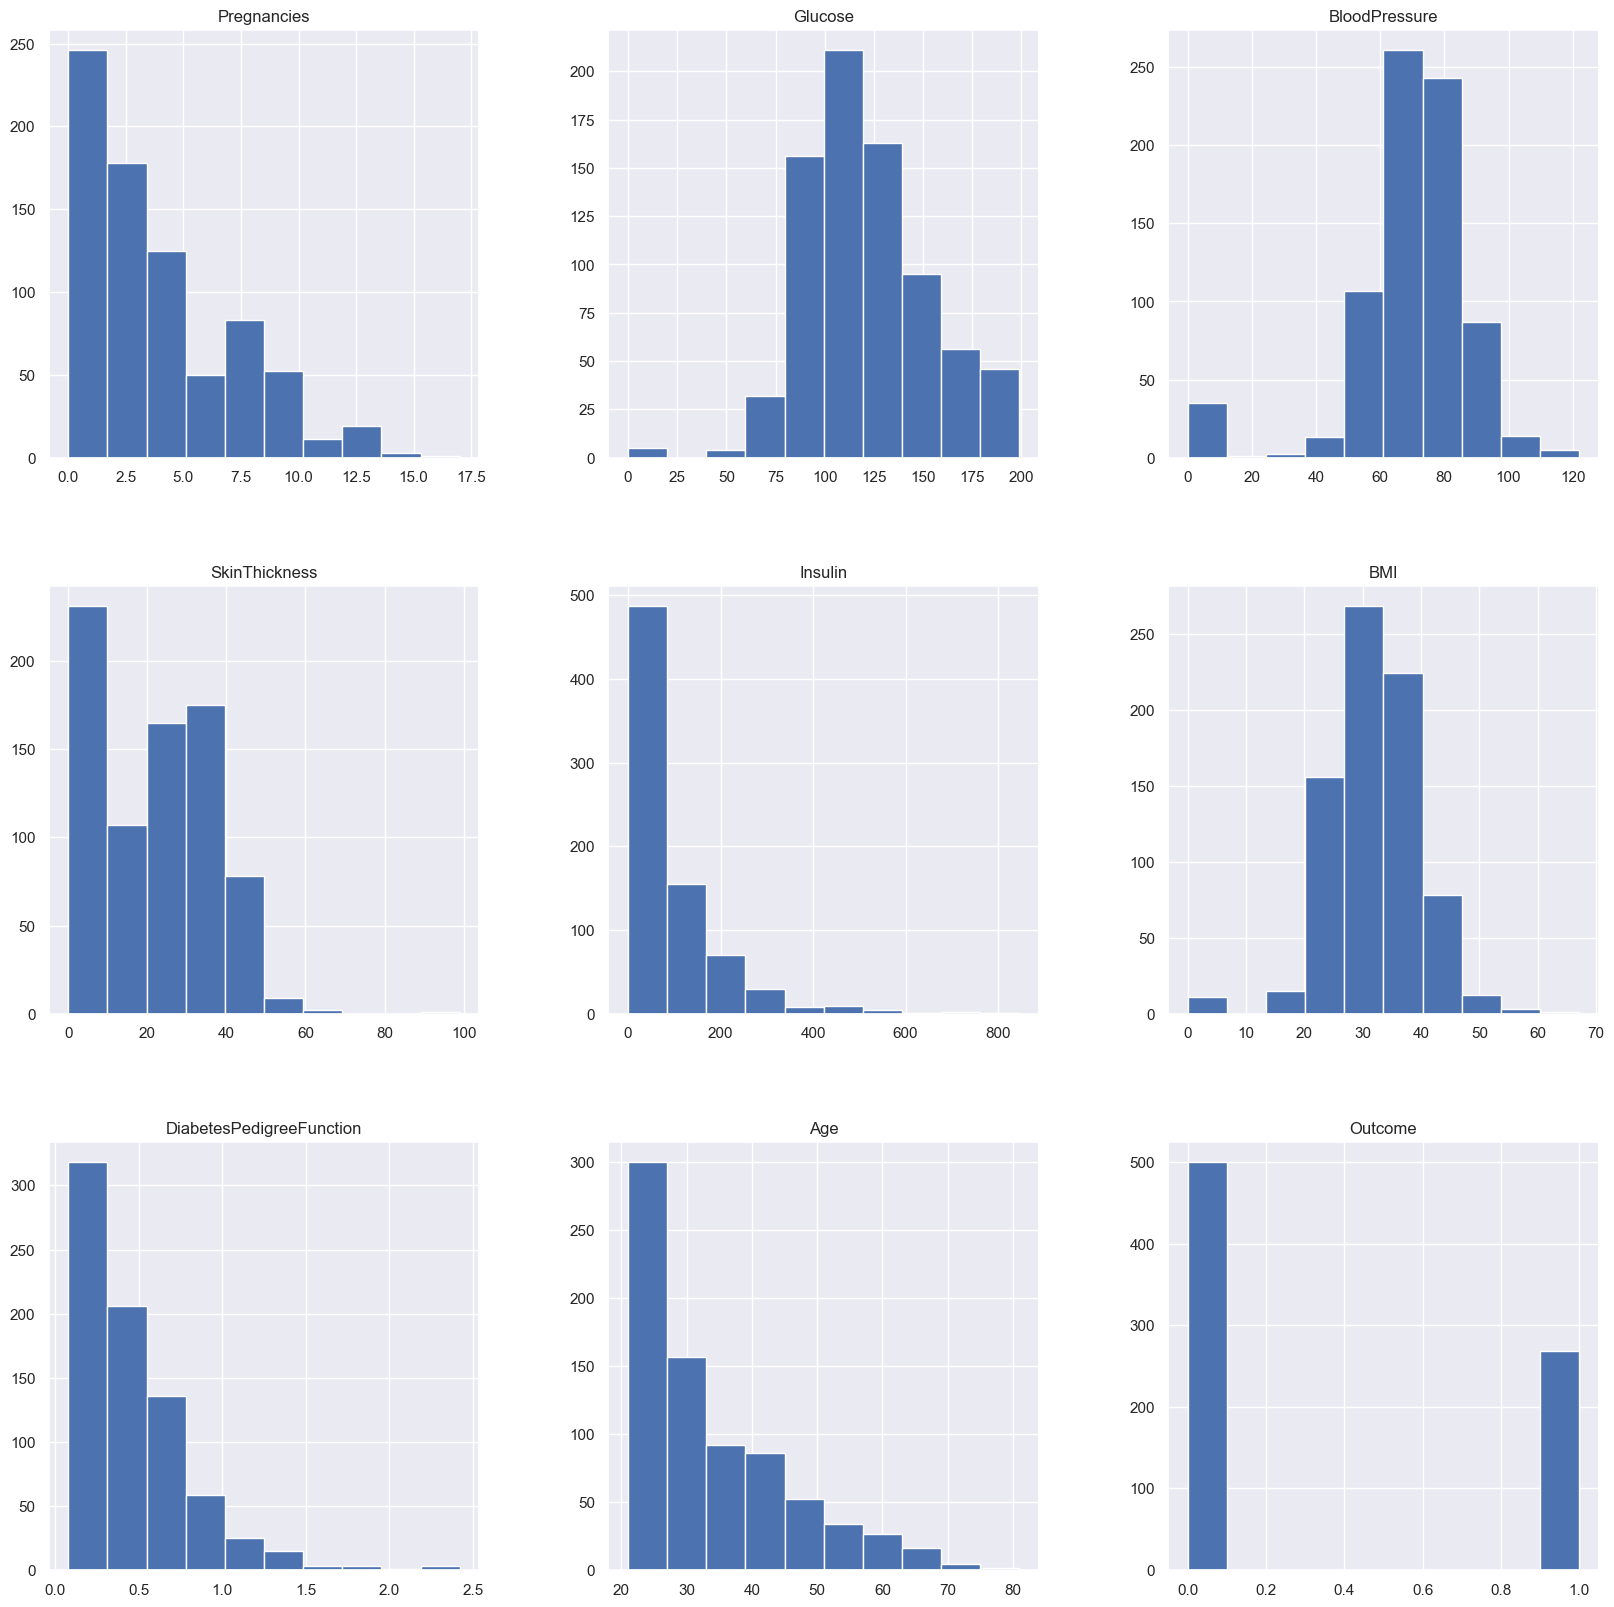

In [4]:
diabetes_data.hist(figsize = (20,20))

In [5]:
diabetes_data_updated['Glucose'].fillna(diabetes_data_updated['Glucose'].mean(), inplace = True)
diabetes_data_updated['BloodPressure'].fillna(diabetes_data_updated['BloodPressure'].mean(), inplace = True)
diabetes_data_updated['SkinThickness'].fillna(diabetes_data_updated['SkinThickness'].median(), inplace = True)
diabetes_data_updated['Insulin'].fillna(diabetes_data_updated['Insulin'].median(), inplace = True)
diabetes_data_updated['BMI'].fillna(diabetes_data_updated['BMI'].median(), inplace = True)

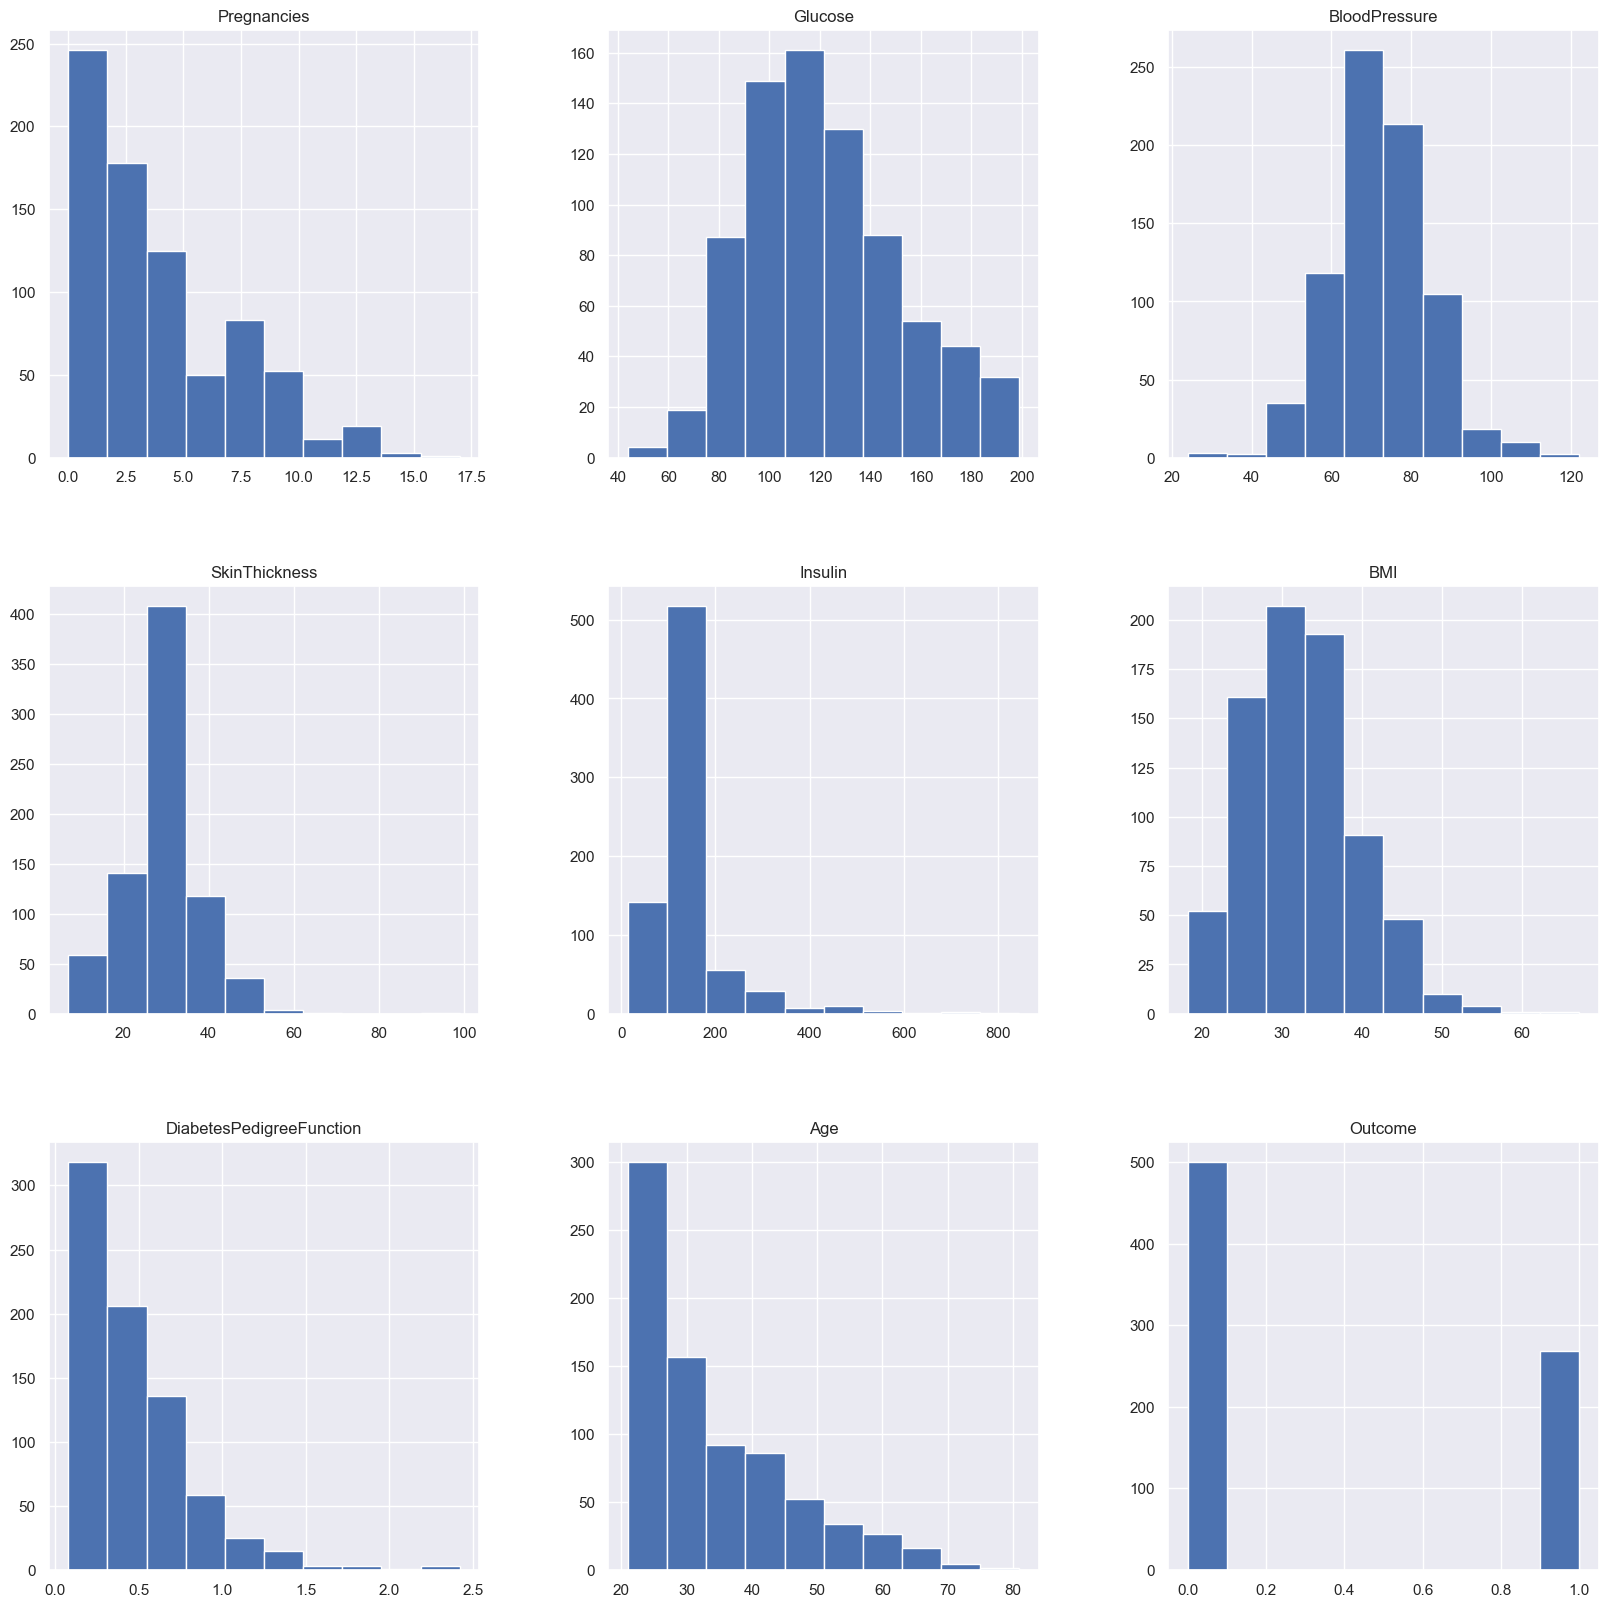

In [6]:
clean_diabetes_data = diabetes_data_updated.hist(figsize = (20,20))


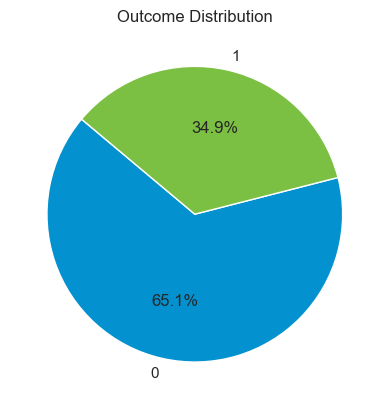

In [23]:
import matplotlib.pyplot as plt

color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors =diabetes_data_updated["Outcome"].map(lambda x: color_wheel.get(x + 1))
outcome_counts = diabetes_data_updated["Outcome"].value_counts()

# Plotting a pie chart
plt.pie(outcome_counts, labels=outcome_counts.index, colors=[color_wheel.get(x + 1) for x in outcome_counts.index], autopct='%1.1f%%', startangle=140)
plt.title("Outcome Distribution")
plt.show()

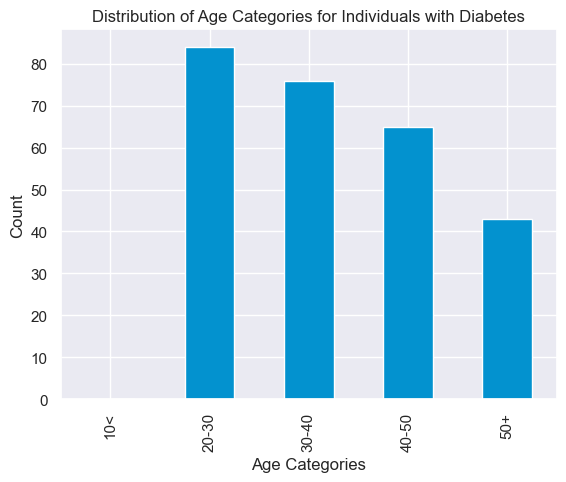

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

age_bins = [10, 20, 30, 40, 50, 150]  
age_labels = ['10<', '20-30', '30-40', '40-50', '50+'] 


diabetes_data_updated = diabetes_data_updated[diabetes_data_updated['Outcome'] == 1]

diabetes_data_updated['AgeCategory'] = pd.cut(diabetes_data_updated['Age'], bins=age_bins, labels=age_labels, right=False)

age_category_counts = diabetes_data_updated['AgeCategory'].value_counts().sort_index()
age_category_counts.plot(kind='bar', color="#0392cf")
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.title('Distribution of Age Categories for Individuals with Diabetes')
plt.show()

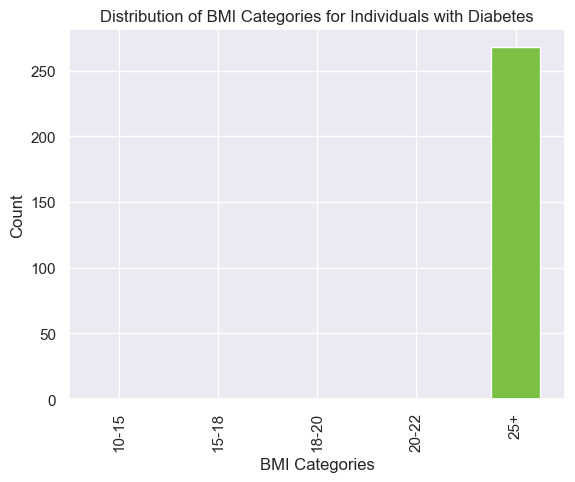

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

bmi_bins = [10, 15, 18, 20, 22, 100]  
bmi_labels = ['10-15', '15-18', '18-20', '20-22', '25+'] 

diabetes_data_updated = diabetes_data_updated[diabetes_data_updated['Outcome'] == 1]

diabetes_data_updated['BMICategory'] = pd.cut(diabetes_data_updated['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_category_counts = diabetes_data_updated['BMICategory'].value_counts().sort_index()
bmi_category_counts.plot(kind='bar', color="#7bc043")
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories for Individuals with Diabetes')
plt.show()

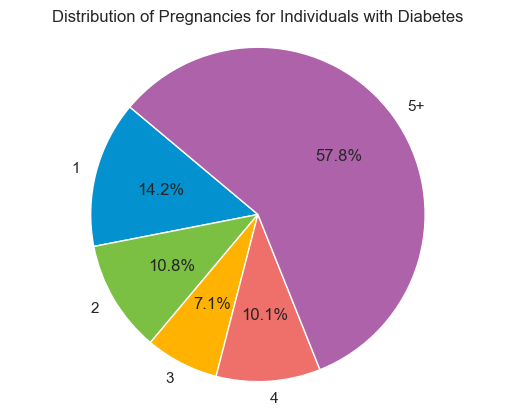

In [26]:
import matplotlib.pyplot as plt

pregnancy_bins = [0, 1, 2, 3, 4, float('inf')] 
pregnancy_labels = ['1', '2', '3', '4', '5+']  

diabetes_data_updated = diabetes_data_updated[diabetes_data_updated['Outcome'] == 1]

diabetes_data_updated['PregnancyCategory'] = pd.cut(diabetes_data_updated['Pregnancies'], bins=pregnancy_bins, labels=pregnancy_labels, right=False)

pregnancy_category_counts = diabetes_data_updated['PregnancyCategory'].value_counts().sort_index()

plt.pie(pregnancy_category_counts, labels=pregnancy_category_counts.index, autopct='%1.1f%%', startangle=140, colors=["#0392cf", "#7bc043", "#ffb200", "#ef6f6a", "#ad62aa"])
plt.axis('equal') 
plt.title('Distribution of Pregnancies for Individuals with Diabetes')
plt.show()

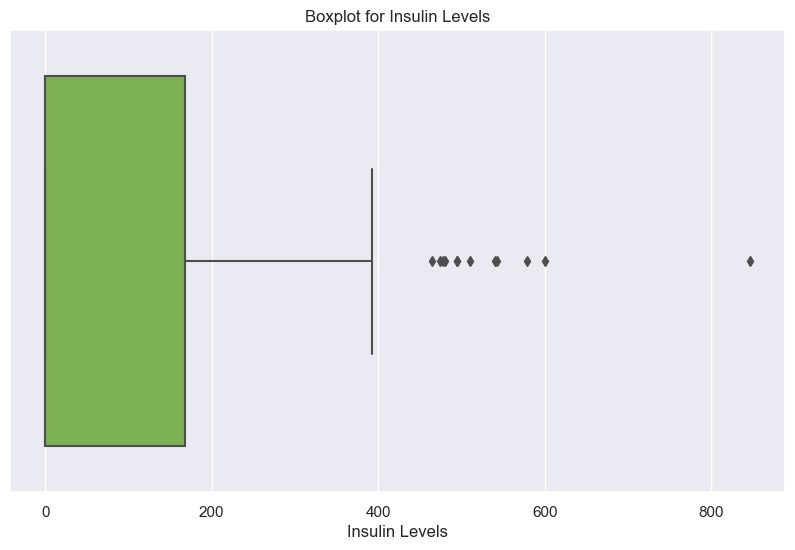

Number of outliers: 12
Outliers:
     Insulin
8        543
13       846
111      495
186      495
220      478
370      465
409      579
415      474
584      600
655      540
695      480
753      510


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_data_no_missing = diabetes_data.dropna(subset=['Insulin'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insulin', data=diabetes_data_no_missing, color='#7bc043')
plt.title('Boxplot for Insulin Levels')
plt.xlabel('Insulin Levels')
plt.show()

# Identify outliers
Q1 = diabetes_data_no_missing['Insulin'].quantile(0.25)
Q3 = diabetes_data_no_missing['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = diabetes_data_no_missing[(diabetes_data_no_missing['Insulin'] < lower_bound) | (diabetes_data_no_missing['Insulin'] > upper_bound)]

print("Number of outliers:", len(outliers))
print("Outliers:")
print(outliers[['Insulin']])

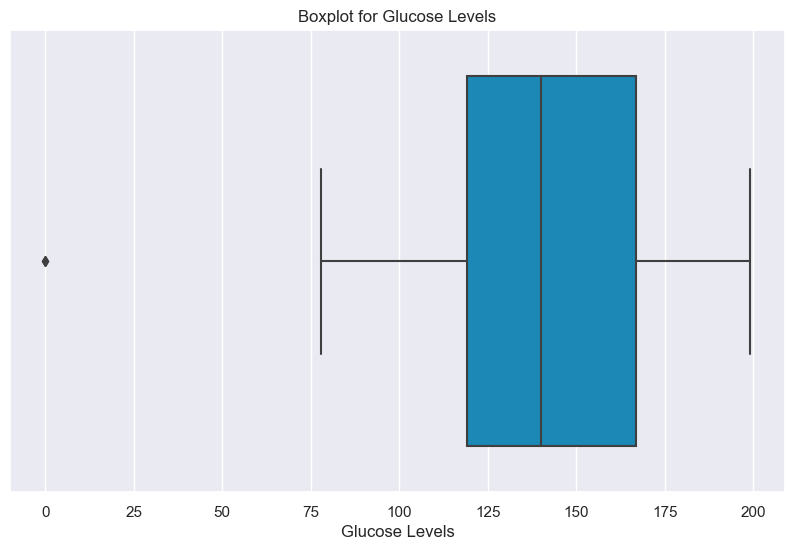

Number of outliers: 2
Outliers:
     Glucose
349        0
502        0


In [12]:
diabetes_data_no_missing_glucose = diabetes_data.dropna(subset=['Glucose'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Glucose', data=diabetes_data_no_missing_glucose, color='#0392cf')
plt.title('Boxplot for Glucose Levels')
plt.xlabel('Glucose Levels')
plt.show()

# Identify outliers
Q1_glucose = diabetes_data_no_missing_glucose['Glucose'].quantile(0.25)
Q3_glucose = diabetes_data_no_missing_glucose['Glucose'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose

lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

outliers_glucose = diabetes_data_no_missing_glucose[(diabetes_data_no_missing_glucose['Glucose'] < lower_bound_glucose) | (diabetes_data_no_missing_glucose['Glucose'] > upper_bound_glucose)]

print("Number of outliers:", len(outliers_glucose))
print("Outliers:")
print(outliers_glucose[['Glucose']])

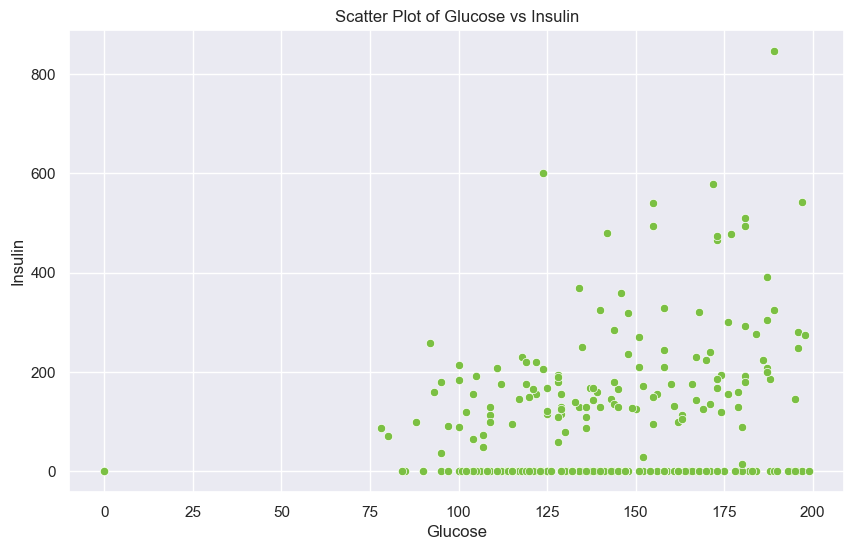

In [13]:

diabetes_data_no_missing_values = diabetes_data.dropna(subset=['Glucose', 'Insulin'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=diabetes_data_no_missing_values, color='#7bc043')
plt.title('Scatter Plot of Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

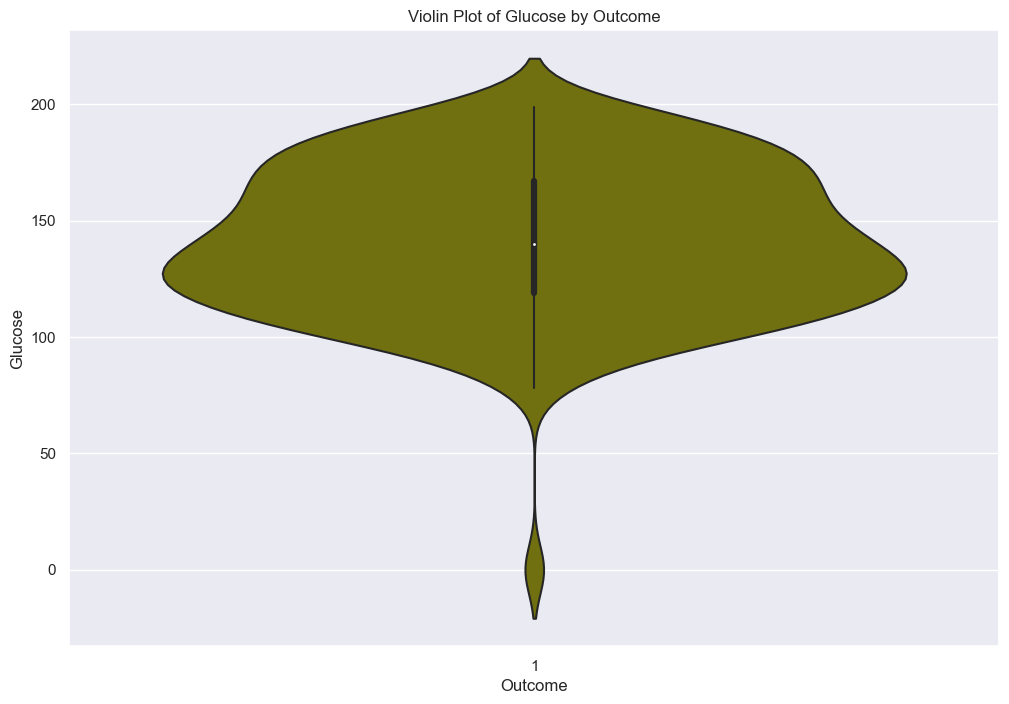

In [14]:
# violin plot of glucose
plt.figure(figsize=(12, 8))
sns.violinplot(x='Outcome', y='Glucose', data=diabetes_data, palette={0: '#650021', 1: '#808000'})
plt.title('Violin Plot of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

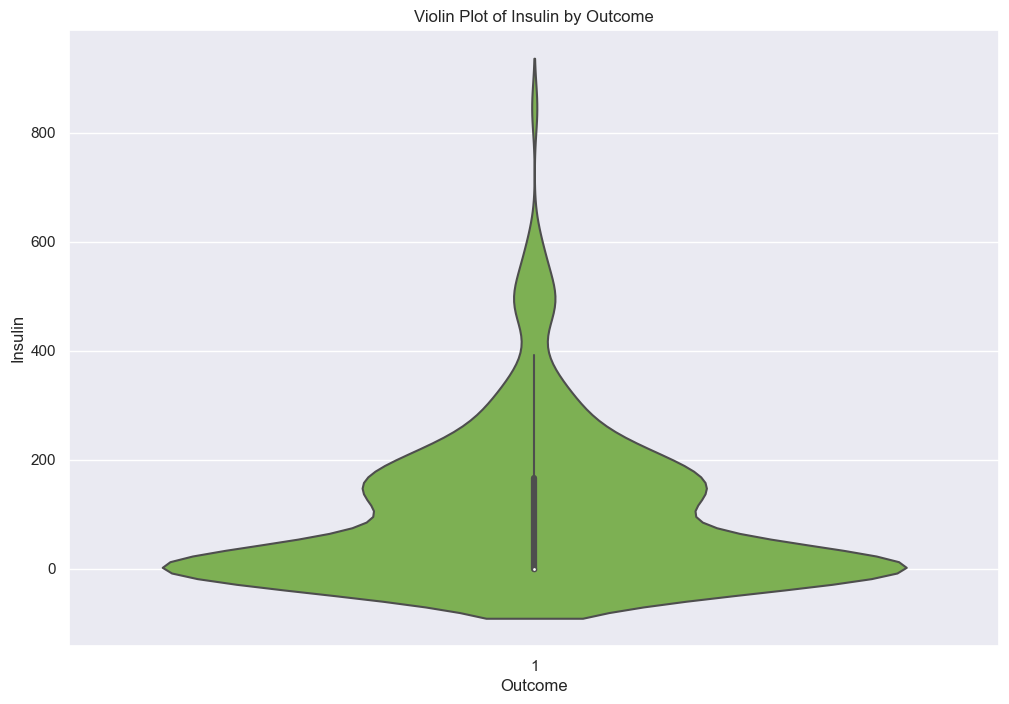

In [15]:
#violin plot of insulin
plt.figure(figsize=(12, 8))
sns.violinplot(x='Outcome', y='Insulin', data=diabetes_data, palette={0: '#0392cf', 1: '#7bc043'})
plt.title('Violin Plot of Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.show()

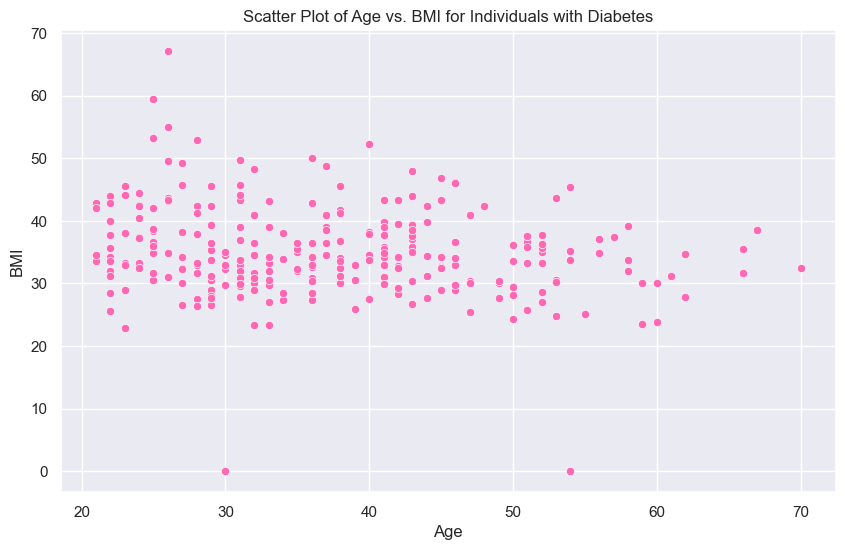

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Age vs. BMI for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=diabetes_data[diabetes_data['Outcome'] == 1], color='#FF69B4')  # Pink color
plt.title('Scatter Plot of Age vs. BMI for Individuals with Diabetes')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()



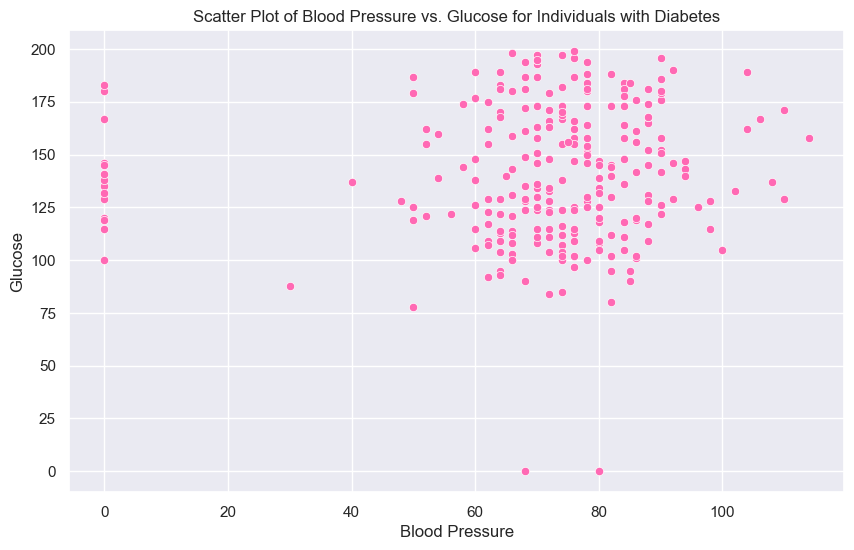

In [17]:
# Scatter Plot of Blood Pressure vs. Glucose for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BloodPressure', y='Glucose', data=diabetes_data[diabetes_data['Outcome'] == 1], color='#FF69B4')  # Pink color
plt.title('Scatter Plot of Blood Pressure vs. Glucose for Individuals with Diabetes')
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose')
plt.show()

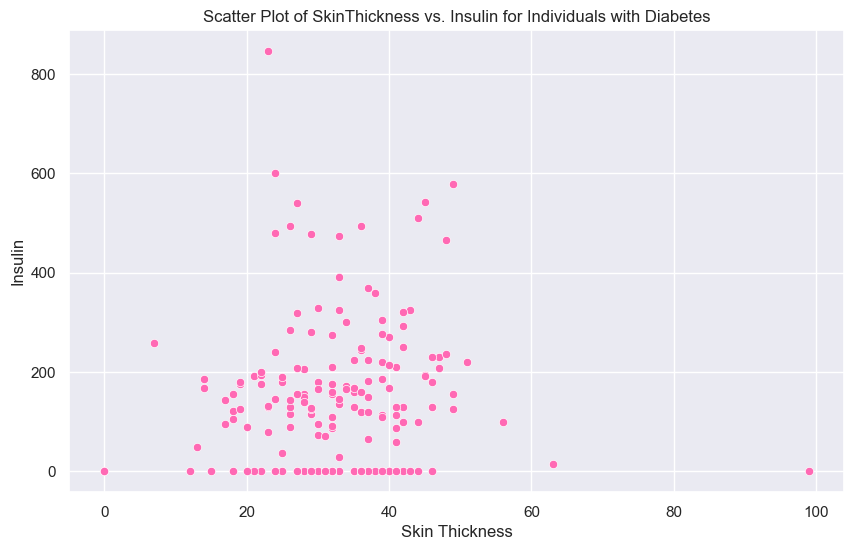

In [18]:
# Scatter Plot of SkinThickness vs. Insulin for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkinThickness', y='Insulin', data=diabetes_data[diabetes_data['Outcome'] == 1], color='#FF69B4')  # Pink color
plt.title('Scatter Plot of SkinThickness vs. Insulin for Individuals with Diabetes')
plt.xlabel('Skin Thickness')
plt.ylabel('Insulin')
plt.show()

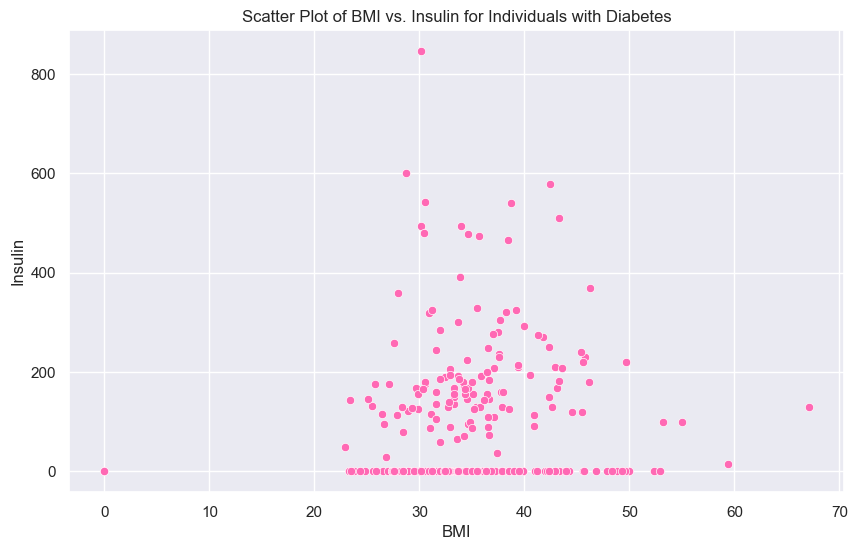

In [19]:
# Scatter Plot of BMI vs. Insulin for individuals with diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Insulin', data=diabetes_data[diabetes_data['Outcome'] == 1], color='#FF69B4')  # Pink color
plt.title('Scatter Plot of BMI vs. Insulin for Individuals with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.show()

In [27]:
print('A descriptive statistical summary summary of the dataset is shown below')
print(diabetes_data_updated.describe())

A descriptive statistical summary summary of the dataset is shown below
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.165573      75.147324      31.686567  164.701493   
std       3.741239   29.541750      11.945712       8.662994  100.932249   
min       0.000000   78.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      29.000000  125.000000   
50%       4.000000  140.000000      74.000000      29.000000  125.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.383582                  0.550500   37.067164      1.0  
std      6.595603                  0.37235

In [29]:

print('This is the shape of the dataset')
print(diabetes_data_updated.shape)
print('These are the columns in the dataset')
print(diabetes_data_updated.columns)
print('The total number of non-na values in the dataset')
print(diabetes_data_updated.info)
print('A descriptive statistical summary summary of the dataset is shown below')
print(diabetes_data_updated.describe())

This is the shape of the dataset
(268, 12)
These are the columns in the dataset
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeCategory',
       'BMICategory', 'PregnancyCategory'],
      dtype='object')
The total number of non-na values in the dataset
<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
2              8    183.0           64.0           29.0    125.0  23.3   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1    128.0           88.0           39.0    110.0  36.5   
757            0    123.0   

In [30]:
diabetes_data_updated.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               268 non-null    int64   
 1   Glucose                   268 non-null    float64 
 2   BloodPressure             268 non-null    float64 
 3   SkinThickness             268 non-null    float64 
 4   Insulin                   268 non-null    float64 
 5   BMI                       268 non-null    float64 
 6   DiabetesPedigreeFunction  268 non-null    float64 
 7   Age                       268 non-null    int64   
 8   Outcome                   268 non-null    int64   
 9   AgeCategory               268 non-null    category
 10  BMICategory               268 non-null    category
 11  PregnancyCategory         268 non-null    category
dtypes: category(3), float64(6), int64(3)
memory usage: 22.3 KB


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('diabetes.csv')

X = df.drop('BMI', axis=1)  # Features
y = df['BMI']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'RMSE: {rmse}')


RMSE: 7.2429316400305535


In [32]:
import numpy as np
import pandas as pd
from scipy.stats import describe, shapiro
from statistics import mode

diabetes_data = pd.read_csv('diabetes.csv')

# Extract the 'Glucose' column 
data = diabetes_data['Glucose'].tolist()

# Measures of Central Tendency
mean_value = np.mean(data)
median_value = np.median(data)
mode_value = mode(data)

# Measures of Spread
range_value = np.ptp(data)
variance_value = np.var(data)
std_dev_value = np.std(data)

# Identifyying the type of distribution using Shapiro-Wilk test
stat, p_value = shapiro(data)
if p_value < 0.05:
    distribution_type = "Not Normally Distributed"
else:
    distribution_type = "Normally Distributed"

# Output the results
print("Measures of Central Tendency:")
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

print("\nMeasures of Spread:")
print("Range:", range_value)
print("Variance:", variance_value)
print("Standard Deviation:", std_dev_value)

print("\nDistribution Type:", distribution_type)


Measures of Central Tendency:
Mean: 120.89453125
Median: 117.0
Mode: 100

Measures of Spread:
Range: 199
Variance: 1020.9172617594401
Standard Deviation: 31.95179590820272

Distribution Type: Not Normally Distributed


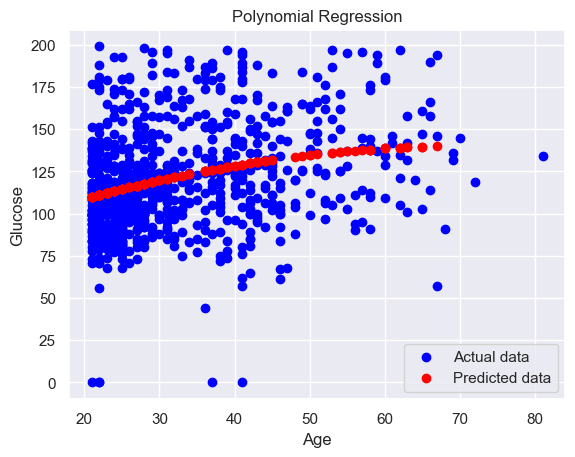

Mean Squared Error: 944.8234565706042
R-squared: 0.061100053531872756


In [33]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable
X = diabetes_data['Age'].values.reshape(-1, 1)
y = diabetes_data['Glucose']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

# Predicting the test set
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# FEATURE ENGINEERING

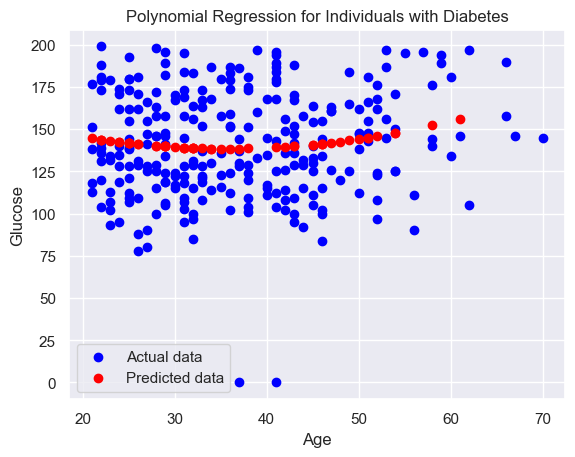

Mean Squared Error: 802.2863410971228
R-squared: 0.007159429810247975


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for individuals with diabetes
diabetes_data_diabetes = diabetes_data[diabetes_data['Outcome'] == 1]

# Assuming X and y are the feature matrix and target variable
X = diabetes_data_diabetes['Age'].values.reshape(-1, 1)
y = diabetes_data_diabetes['Glucose']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

# Predicting  the test set
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.title('Polynomial Regression for Individuals with Diabetes')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


# linear regression



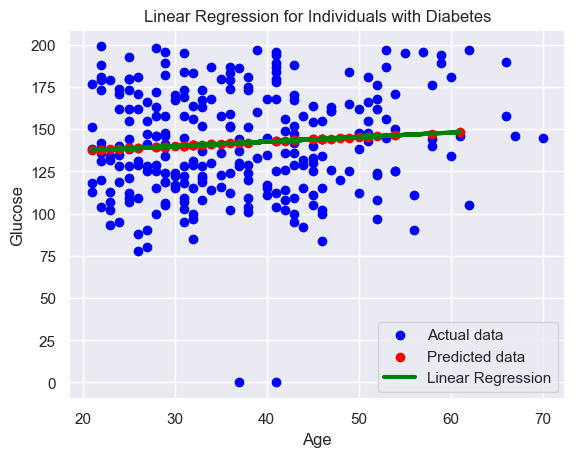

Mean Squared Error: 802.9716648287483
R-squared: 0.006311332105454315


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes_data_diabetes = diabetes_data[diabetes_data['Outcome'] == 1]

X = diabetes_data_diabetes['Age'].values.reshape(-1, 1)
y = diabetes_data_diabetes['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Linear Regression')
plt.title('Linear Regression for Individuals with Diabetes')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Question 1:
Introduction:
The healthcare industry is large and evolving, with advances in technology and medical research opening doors for better patient outcomes. Understanding and treating chronic illnesses, like diabetes, which affects millions of people globally, is a critical component of healthcare. This study aims to use machine learning methods, particularly linear regression models, to get understanding of the variables affecting diabetes. By doing this, we want to provide important insights that will improve our comprehension of the illness and maybe result in improved treatments and preventative measures.

Domain-Specific Area: One of the biggest threats to world health is diabetes, a chronic metabolic illness. It is critical to understand the underlying causes of diabetes as its incidence rises. This study focuses on using machine learning in particular, linear regression models—to assess a dataset that includes several factors relevant to health. These statistics give an in-depth overview of all the variables related to diabetes, including age, BMI, insulin values, glucose levels, and more.

Objectives:
Analyzing exploratory data (EDA): Examine the dataset carefully, looking for trends, patterns, and any outliers. This phase lays the groundwork for further analysis.
Cleaning and Imputation of Data: Use appropriate techniques to deal with missing or inaccurate data, such as mean, median, or mode imputation. By doing this, the dataset's integrity is guaranteed, establishing the foundation for precise model training.
Characteristic Statistics Produce descriptive statistics in order to obtain a summary and understanding of the distribution of important variables. This stage facilitates comprehension of the features of the dataset.
Visualizations: To show the data distribution graphically, create visualizations such as boxplots and histograms. 

Justification: This project's potential to reveal complex connections between diabetes and other health indicators makes it relevant. In order to quantify these correlations, linear regression models offer a useful tool with predictive analysis that can help healthcare professionals identify people who are more likely to get diabetes.
Impact and Contribution: The results of this study will have a wide range of effects on the scientific and medical sectors. Medical professionals may create customized therapies and targeted treatments by having a thorough understanding of the interactions between diabetes risk factors and parameters such as age, BMI, and insulin levels. Furthermore, the project's discoveries add to the increasing amount of information on diabetes, which may have an impact on public health regulations and preventative measures.
Conclusion:
The goal of our exploration of diabetes via the lens of linear regression models is to get a deeper understanding of the disease's complex nature in addition to predicting accuracy. This research is in line with the overarching objective of using data-driven strategies to enhance health outcomes and, eventually, promote global population health.
Source of the dataset: https://www.kaggle.com/datasets/uciml/database/pima-indians-diabetes



Question 2:
The project's dataset, which focuses on diabetes and other health-related factors, provides a wide range of data for investigation and analysis. The complex correlations between variables including an individual's age, BMI, insulin values, glucose levels, and pregnancy history may be better understood thanks to this information. This specific collection, which was obtained from the well-known dataset marketplace Kaggle, offers a wealth of data drawn from real-world scenarios, making it highly relevant to our investigation.

Details of the Dataset: This dataset includes a wide range of factors, each of which provides a distinct perspective on people's health. Among these variables are:
- Glucose: A measure of blood sugar.
- Insulin: A key hormone in controlling blood sugar levels, this indicator shows insulin levels.
- Age: Giving an individual's age, which is frequently linked to their risk of developing diabetes.
- Body Mass Index (BMI): Show the height and weight relationship
- Pregnancies: Tracking the total number of pregnancies among women.

Size and Data Types: A large number of items in the dataset enable thorough analysis and model training. With a significant amount of records that include both people with and without diabetes, the dataset offers a fair representation of a range of health characteristics. In addition to categorical values for outcomes like pregnancies, the data types also include numerical values for continuous variables like age, BMI, insulin, glucose, and so forth.

Acquisition: Researchers, data scientists, and healthcare professionals collaborated to meticulously gather the dataset in order to guarantee its reliability and usefulness. An focus is placed on anonymity and privacy while adhering to ethical principles during the data collection procedure. 


The dataset was obtained from Kaggle, a website that is renowned for storing quality datasets that are contributed by researchers and companies from all over the world. 
Source of the dataset: https://www.kaggle.com/datasets/uciml/database/pima-indians-diabetes

In conclusion, the dataset that was selected, which is focused on diabetes and health metrics, turns out to be a useful resource for our research. Its vastness, variety of variables, and ethical collection make it the perfect tool for investigating the complex relationships between diabetes risk factors. Our goal as we examine the dataset is to identify significant trends and add to the general knowledge of diabetes, which could eventually contribute to the development of more appropriate medical procedures and treatments.



3. Data Preparation:

The dataset was initially loaded into a Pandas DataFrame from a CSV file. A thorough examination revealed that some crucial health parameters, such as Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI, had entries with zero values. To address this, zero values were replaced with NaN to facilitate a more accurate representation of missing data. Subsequently, missing values were imputed using appropriate strategies. For instance, the mean was employed for Glucose and Blood Pressure, the median for Skin Thickness, and the median for both Insulin and BMI. This meticulous cleaning process ensures the dataset's integrity and paves the way for robust analysis . This was done after generating a histogram for the unclean data and then looking at the distribution of the histograms for each factor and then deciding on what is the most appropriate method to replace the missing data with (mean/mode/median).

4. Statistical Analysis:
Statistical analysis involved calculating measures of central tendency, spread, and identifying the distribution of key variables. For Glucose and Insulin, essential factors in diabetes analysis, the mean, median, and standard deviation were computed. These statistics provide insights into the central values and variability within these variables. Additionally, histogram plots were generated to visualize the distribution of Glucose and Insulin, aiding in identifying patterns and potential outliers.From the boxplots , it can be concluded that the outliers for glucose and insulin are 2 and 12 respectively.Also statistical analysis can be generated through code like describe().

5. Visualization:

Matplotlib was employed to visualize key data series. Histograms showcased the distribution of Glucose and Insulin levels. Scatter plots illustrated relationships between variables, such as Glucose against Insulin, offering insights into potential correlations. The most crucial visualization is arguably the outcome distribution pie chart, shedding light on the proportion of individuals with and without diabetes, a cornerstone for subsequent analyses.The conclusion for the pie chart is that the outcome distribution is 65.1% for 0 (no diabetes) and 34.9% for 1(diabetes) .Next is a bar chart , which visualizes the distribution of Age Categories for Individuals with Diabetes, through which it could be concluded that the highest occurrence of diabetes is forage group 20-30 and the occurrence decreases as the age increases, there is no recorded individual who is below 10 and have diabetes according to this dataset.And in another bar chart visualization which is based on “Distribution of BMI Categories for Individuals with Diabetes”, it could be concluded that everyone with diabetes , according to this dataset has a bmi of 25+.And in a piechart which is based “Distribution of Pregnancies for Individuals with Diabetes” , it could be concluded that the highest percentage of people who have diabetes has had more than 5 pregnancies, which was 57.8%. Next in a boxplot for insulin , it could be concluded that there were 12 outliers. For the boxplot for glucose , it could be concluded that there were two outliers.For polynomial regression and linear regression it could be concluded that the predicted data is so close to the actual data . most of the individuals who are aged 20- 50+ have glucose levels between 120-150 for people with diabetes as a best fit line was drawn withing that range.

6. Building ML Model:
The dataset was split into features (X) and labels (y), where features encompassed relevant health parameters. Scikit-learn facilitated the implementation of linear regression models. The age and BMI features were chosen for predicting Glucose levels, a key health metric in diabetes analysis. The model was evaluated using mean squared error and R-squared values.The RMSE value for BMI was RMSE: 7.2429316400305535.Then through polynomial regression of age and glucose it could be concluded that the  Mean Squared Error: 944.8234565706042 and R-squared: 0.061100053531872756.Then another polynomial regression was carried out for individuals with diabetes in particular for the same variables, age and glucose and it could be derived that Mean Squared Error: 802.2863410971228 and R-squared: 0.007159429810247975. Finally , for linear regression , using the same two variables , age and glucose , it could be derived that Mean Squared Error: 802.9716648287483 and R-squared: 0.006311332105454315.

7. Validation:
Cross-validation was considered for robust model validation. This process involves splitting the dataset into multiple subsets for training and testing, ensuring the model's generalizability.

8. Feature Engineering:
Feature engineering was applied to enhance the model's predictive power. Polynomial features of degree 2 were introduced to capture potential non-linear relationships between age and Glucose.
